In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

60.8780570992007 -51.95465191881041
6.847911491910082 -112.05929378050624
-87.13247974662369 -36.47133465227884
-62.43389979614435 -11.774288627020127
-0.5340700130917639 15.560895367205603
-16.19249339035086 82.41741347739031
16.505959648591784 106.42344106163551
-59.70541974208408 -131.65458755502772
55.14870575445059 -2.9353875736804866
16.8022669131515 35.184248230648706
-76.7608113754124 162.5235318700329
56.50643376843831 -152.33095669471692
9.078911494367105 -172.27390243182157
-74.63258947109586 -176.18502826459928
-84.66572809242481 50.95801360876453
29.170380251292045 36.28315463893989
13.736468778524795 52.72118514589664
-77.36194742299207 -130.5704910181112
-72.74430237167977 36.29265574843237
-36.23500767804443 -55.48723029569004
-49.97497606360325 -42.21101381580948
-56.634717241803564 -17.62003886729258
-49.36307102988812 53.8044257967681
-37.330342338654596 -20.693081882377754
-45.497724923391736 -92.69409219742612
-21.29018103831976 -79.72574665640822
-32.4508638372526

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list with enumerate() method.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | paamiut
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | owando
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | saravan
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | langholm
Processing Record 10 of Set 1 | wagar
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | tabuk
Processing Record 17 of Set 1 | bereda
Processing Record 18 of Set 1 | maldonado
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | sao joao da barra
Processing R

Processing Record 38 of Set 4 | mount isa
Processing Record 39 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 40 of Set 4 | gornopravdinsk
Processing Record 41 of Set 4 | gimbi
Processing Record 42 of Set 4 | bonthe
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | avera
Processing Record 45 of Set 4 | faya
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | lebu
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | pingliang
Processing Record 50 of Set 4 | chagda
City not found. Skipping...
Processing Record 1 of Set 5 | maumere
Processing Record 2 of Set 5 | tazmalt
Processing Record 3 of Set 5 | velyka bahachka
Processing Record 4 of Set 5 | taylor
Processing Record 5 of Set 5 | olafsvik
Processing Record 6 of Set 5 | krasnokamensk
Processing Record 7 of Set 5 | saint george
Processing Record 8 of Set 5 | pozo colorado
Processing Record 9 of Set 5 | srednekolymsk
Processing Record 10 of Set 5 | grand 

Processing Record 24 of Set 8 | sakakah
Processing Record 25 of Set 8 | pilot butte
Processing Record 26 of Set 8 | oswego
Processing Record 27 of Set 8 | itarema
Processing Record 28 of Set 8 | alipur duar
City not found. Skipping...
Processing Record 29 of Set 8 | sao miguel do araguaia
Processing Record 30 of Set 8 | oriximina
Processing Record 31 of Set 8 | oksfjord
Processing Record 32 of Set 8 | gbarnga
Processing Record 33 of Set 8 | sedkyrkeshch
Processing Record 34 of Set 8 | englehart
Processing Record 35 of Set 8 | jesenice
Processing Record 36 of Set 8 | moussoro
Processing Record 37 of Set 8 | praia
Processing Record 38 of Set 8 | teguise
Processing Record 39 of Set 8 | huejuquilla el alto
Processing Record 40 of Set 8 | muli
Processing Record 41 of Set 8 | chulym
Processing Record 42 of Set 8 | kaset sombun
Processing Record 43 of Set 8 | conil
Processing Record 44 of Set 8 | bafata
Processing Record 45 of Set 8 | kipushi
Processing Record 46 of Set 8 | umm kaddadah
Proce

Processing Record 14 of Set 12 | mizdah
Processing Record 15 of Set 12 | zheleznodorozhnyy
Processing Record 16 of Set 12 | key west
Processing Record 17 of Set 12 | awjilah
Processing Record 18 of Set 12 | gumdag
Processing Record 19 of Set 12 | crib point
Processing Record 20 of Set 12 | bengkulu
Processing Record 21 of Set 12 | tiznit
Processing Record 22 of Set 12 | szczytno
Processing Record 23 of Set 12 | pimentel
Processing Record 24 of Set 12 | veraval
Processing Record 25 of Set 12 | pontal do parana
Processing Record 26 of Set 12 | grindavik
Processing Record 27 of Set 12 | henties bay
Processing Record 28 of Set 12 | touros
Processing Record 29 of Set 12 | peruibe
Processing Record 30 of Set 12 | shubarkuduk
Processing Record 31 of Set 12 | cockburn town
Processing Record 32 of Set 12 | caxito
Processing Record 33 of Set 12 | jinchang
Processing Record 34 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 35 of Set 12 | phangnga
Processing Record 36 of Set

In [11]:
# Tally number of cities.
len(city_data)

568

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paamiut,61.9940,-49.6678,45.37,96,100,10.87,GL,2022-07-20 13:56:27
1,San Patricio,28.0170,-97.5169,85.87,64,2,15.21,US,2022-07-20 13:56:27
2,Ushuaia,-54.8000,-68.3000,37.06,87,100,16.11,AR,2022-07-20 13:54:24
3,Cape Town,-33.9258,18.4232,61.11,53,20,12.66,ZA,2022-07-20 13:54:55
4,Owando,-0.4819,15.8999,88.03,46,74,4.56,CG,2022-07-20 13:56:28
5,Hithadhoo,-0.6000,73.0833,81.10,70,100,1.23,MV,2022-07-20 13:56:28
6,Saravan,39.7196,45.6483,82.69,34,12,8.37,AM,2022-07-20 13:56:28
7,Rikitea,-23.1203,-134.9692,72.91,76,6,2.21,PF,2022-07-20 13:56:29
8,Langholm,55.1510,-2.9989,69.31,72,100,7.58,GB,2022-07-20 13:56:29
9,Wagar,16.1525,36.2032,97.38,29,98,15.19,SD,2022-07-20 13:56:29


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Paamiut,GL,2022-07-20 13:56:27,61.9940,-49.6678,45.37,96,100,10.87
1,San Patricio,US,2022-07-20 13:56:27,28.0170,-97.5169,85.87,64,2,15.21
2,Ushuaia,AR,2022-07-20 13:54:24,-54.8000,-68.3000,37.06,87,100,16.11
3,Cape Town,ZA,2022-07-20 13:54:55,-33.9258,18.4232,61.11,53,20,12.66
4,Owando,CG,2022-07-20 13:56:28,-0.4819,15.8999,88.03,46,74,4.56
5,Hithadhoo,MV,2022-07-20 13:56:28,-0.6000,73.0833,81.10,70,100,1.23
6,Saravan,AM,2022-07-20 13:56:28,39.7196,45.6483,82.69,34,12,8.37
7,Rikitea,PF,2022-07-20 13:56:29,-23.1203,-134.9692,72.91,76,6,2.21
8,Langholm,GB,2022-07-20 13:56:29,55.1510,-2.9989,69.31,72,100,7.58
9,Wagar,SD,2022-07-20 13:56:29,16.1525,36.2032,97.38,29,98,15.19


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658326305.5752428

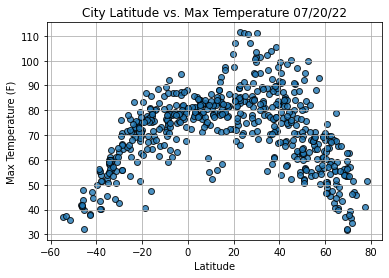

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

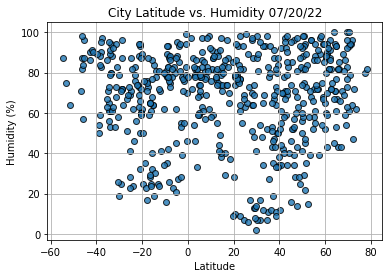

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

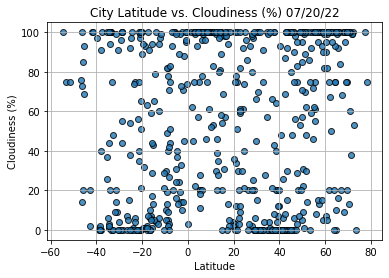

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

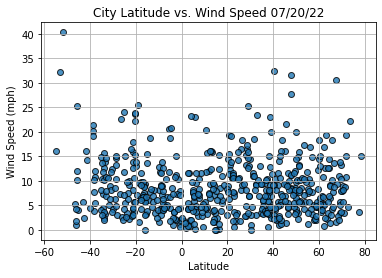

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Find correlation between lat and max temps

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Paamiut,GL,2022-07-20 13:56:27,61.9940,-49.6678,45.37,96,100,10.87
1,San Patricio,US,2022-07-20 13:56:27,28.0170,-97.5169,85.87,64,2,15.21
6,Saravan,AM,2022-07-20 13:56:28,39.7196,45.6483,82.69,34,12,8.37
8,Langholm,GB,2022-07-20 13:56:29,55.1510,-2.9989,69.31,72,100,7.58
9,Wagar,SD,2022-07-20 13:56:29,16.1525,36.2032,97.38,29,98,15.19


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

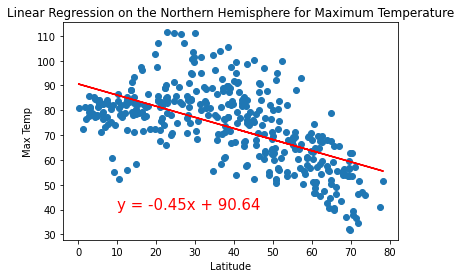

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

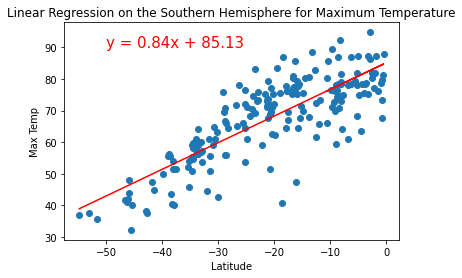

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

## Find correlation between lat and  % humidity

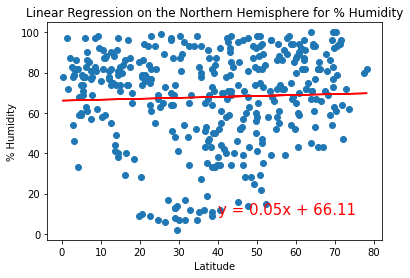

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

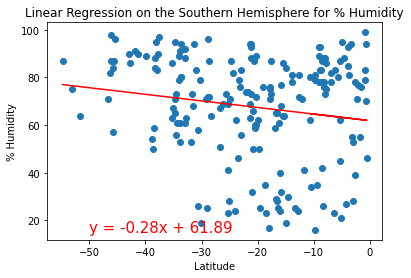

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity','% Humidity',(-50,15))

## Find correlation between lat and % cloudiness

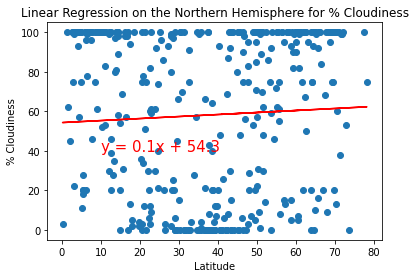

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,40))

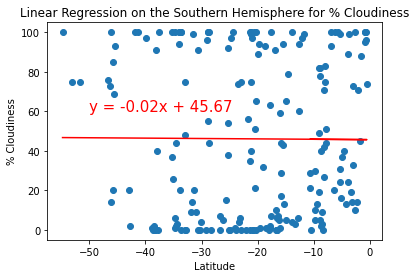

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

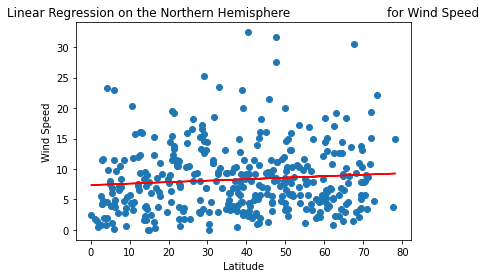

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

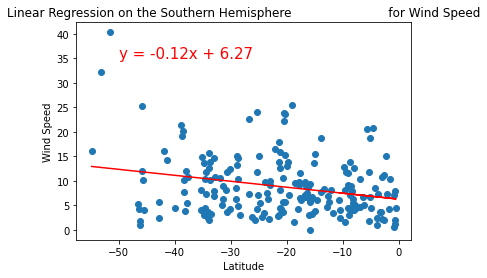

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))